In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
import seaborn as sns
from sklearn.ensemble import VotingClassifier

In [ ]:
data=pd.read_csv("/content/HeartDisease.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Columns:
numeric_features = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
categorical_features = ['chest_pain_type', 'rest_ecg', 'slope', 'thalassemia', 'vessels_colored_by_flourosopy']
binary_features = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']

# Preprocessing:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

binary_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=[['Male', 'Female'],['Lower than 120 mg/ml','Greater than 120 mg/ml'],['Yes', 'No']]))
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories=[
    ['typical', 'atypical', 'non-anginal', 'asymptomatic'],  # chest_pain_type
    ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'],  # rest_ecg
    ['upsloping', 'flat', 'downsloping'],  # slope
    ['normal', 'fixed defect', 'reversible defect'],  # thalassemia
    ['Zero', 'One', 'Two', 'Three']  # vessels_colored_by_flourosopy
], drop='first', handle_unknown='ignore'))])


# Combine all:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('bin', binary_transformer, binary_features),
    ('cat', categorical_transformer, categorical_features)
])


# ***LOGISTIC REGRESSION***

In [ ]:
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cv_results = cross_validate(log_model, X_train, y_train, cv=5,
                            scoring=['accuracy', 'precision', 'recall', 'f1'])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

In [ ]:
print("Cross-Validation Results (on Training Set):")
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Precision:", cv_results['test_precision'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1 Score:", cv_results['test_f1'].mean())


Cross-Validation Results (on Training Set):
Mean Accuracy: 0.8292682926829269
Mean Precision: 0.8217044138255044
Mean Recall: 0.8533613445378151
Mean F1 Score: 0.8371869001265992


In [ ]:
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholestoral',
                                                   'Max_heart_rate',
                                                   'oldpeak']),
                                                 ('bin',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Male',
                                                                                               'Female'],
                                                                                              ['Lower '
                                                                                               'than '
                                                                                               '120 '
                                                                                               'mg/ml',
                                                                                               'Greater '
                                                                                               'than '
                                                                                               '120 '
                                                                                               'mg/ml'],
                                                                                              ['Yes',
                                                                                               'No']]))]),
                                                  ['sex...
                                                                                              'ST-T '
                                                                                              'wave '
                                                                                              'abnormality',
                                                                                              'left '
                                                                                              'ventricular '
                                                                                              'hypertrophy'],
                                                                                             ['upsloping',
                                                                                              'flat',
                                                                                              'downsloping'],
                                                                                             ['normal',
                                                                                              'fixed '
                                                                                              'defect',
                                                                                              'reversible '
                                                                                              'defect'],
                                                                                             ['Zero',
                                                                                              'One',
                                                                                              'Two',
                                                                                              'Three']],
                                                                                 dro

In [ ]:
y_pred = log_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("----------------------------------------------------------------")

print(" Classification Report:\n", classification_report(y_test, y_pred))

print("----------------------------------------------------------------")

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[78 24]
 [16 87]]
----------------------------------------------------------------
 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80       102
           1       0.78      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

----------------------------------------------------------------
Accuracy Score: 0.8048780487804879


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


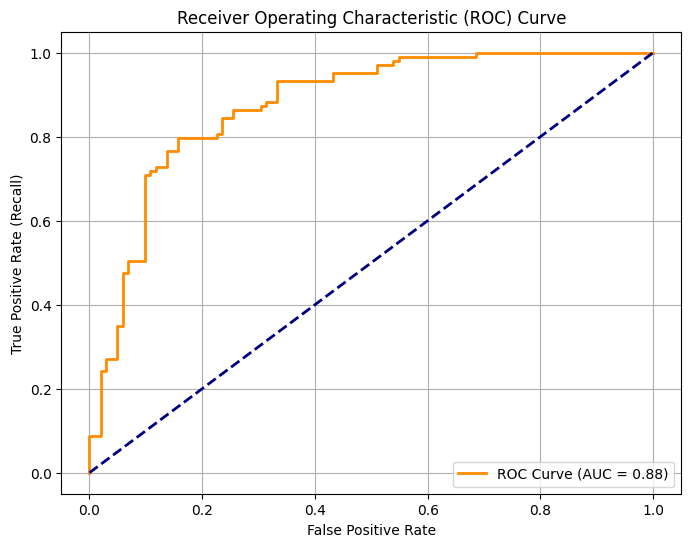

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

#  Predict probabilities on Test Set:
y_proba = log_model.predict_proba(X_test)[:, 1]  # Probability estimates for class 1 (Heart Disease)

#ROC Curve:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()




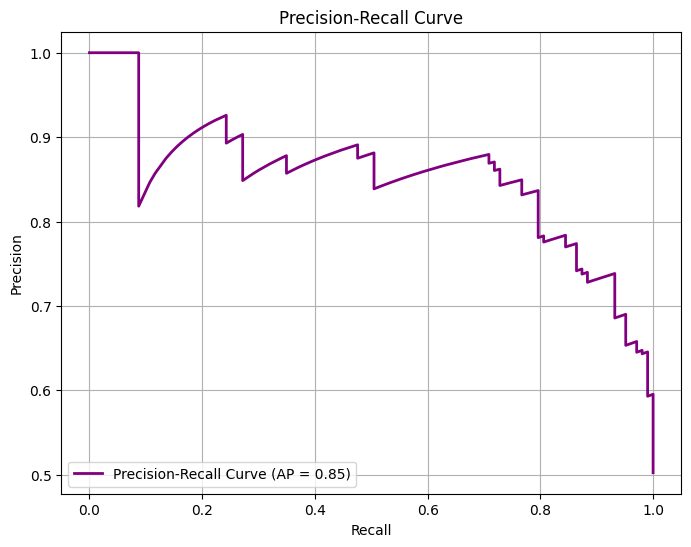

In [ ]:
# Precision-Recall Curve:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall Curve (AP = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

# ***TRAINING AND TESTING OF SVM,RANDOM FOREST , DECISION TREE,ADABOOSTING, BAGGING,VOTING CLASSIFIER***

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(name, model, X_train, X_test, y_train, y_test, cv=5):
    print(f"\n{'='*50}\nEvaluating: {name}\n{'='*50}")

    # Cross-validation on training data:
    cv_results = cross_validate(model, X_train, y_train, cv=cv,
                                scoring=['accuracy', 'precision', 'recall', 'f1'])

    print("Cross-Validation Results (Training Set):")
    print(f"Mean Accuracy:  {cv_results['test_accuracy'].mean():.4f}")
    print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
    print(f"Mean Recall:    {cv_results['test_recall'].mean():.4f}")
    print(f"Mean F1 Score:  {cv_results['test_f1'].mean():.4f}")

    # Fit model and predict on Test Set:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nTest Set Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print(f"Test Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

    return model


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# Example classifiers with your pipeline:
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='linear', random_state=42))
])

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

bagging_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(random_state=42))
])

ada_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

voting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ], voting='soft'))
])


In [ ]:
models = {
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Bagging': bagging_model,
    'AdaBoost': ada_model,
    'Voting Classifier': voting_model
}

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)



Evaluating: SVM


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.8341
Mean Precision: 0.8319
Mean Recall:    0.8487
Mean F1 Score:  0.8400


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e


Test Set Evaluation:
Confusion Matrix:
 [[78 24]
 [17 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       102
           1       0.78      0.83      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

Test Accuracy Score: 0.8000

Evaluating: Decision Tree


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.9695
Mean Precision: 0.9769
Mean Recall:    0.9645
Mean F1 Score:  0.9703

Test Set Evaluation:
Confusion Matrix:
 [[102   0]
 [  0 103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Test Accuracy Score: 1.0000

Evaluating: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.9768
Mean Precision: 0.9812
Mean Recall:    0.9740
Mean F1 Score:  0.9772


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Test Set Evaluation:
Confusion Matrix:
 [[102   0]
 [  0 103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Test Accuracy Score: 1.0000

Evaluating: Bagging


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.9744
Mean Precision: 0.9745
Mean Recall:    0.9764
Mean F1 Score:  0.9752

Test Set Evaluation:
Confusion Matrix:
 [[100   2]
 [  0 103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.98      1.00      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Test Accuracy Score: 0.9902

Evaluating: AdaBoost


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.8366
Mean Precision: 0.8307
Mean Recall:    0.8582
Mean F1 Score:  0.8442


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Test Set Evaluation:
Confusion Matrix:
 [[84 18]
 [14 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       102
           1       0.83      0.86      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Test Accuracy Score: 0.8439

Evaluating: Voting Classifier


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

Cross-Validation Results (Training Set):
Mean Accuracy:  0.9744
Mean Precision: 0.9774
Mean Recall:    0.9740
Mean F1 Score:  0.9751

Test Set Evaluation:
Confusion Matrix:
 [[102   0]
 [  0 103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Test Accuracy Score: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# ***PLOTTING OF ROC CURVE & PRECISION-RECALL CURVE   ***

Model:SVM


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


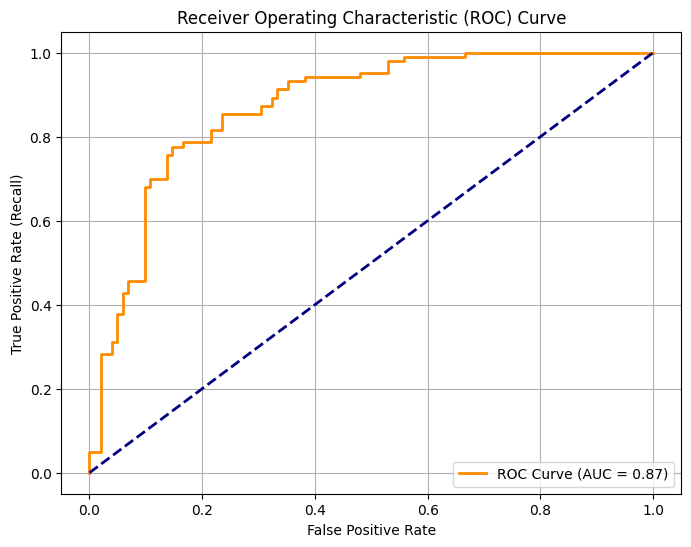

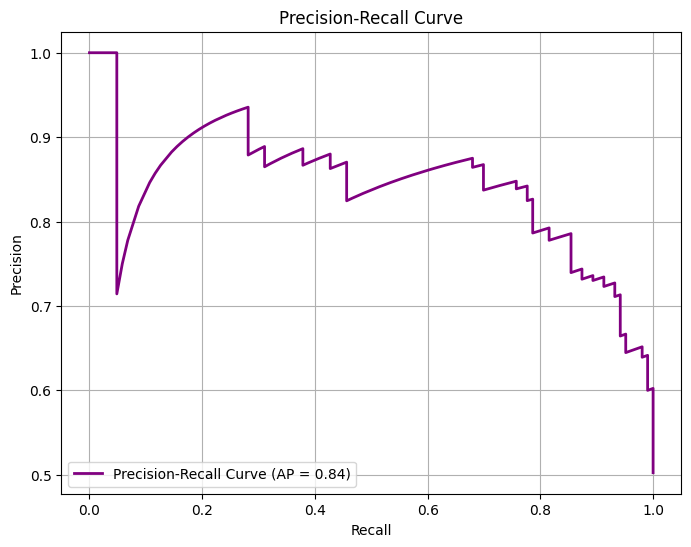

Model:Decision Tree


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


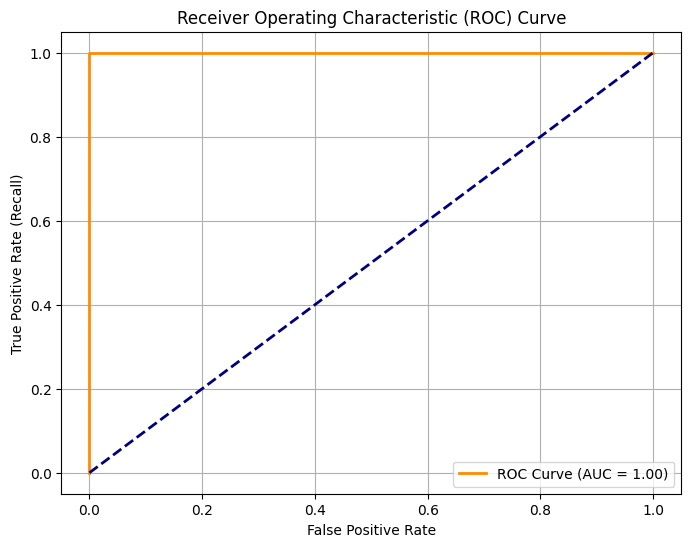

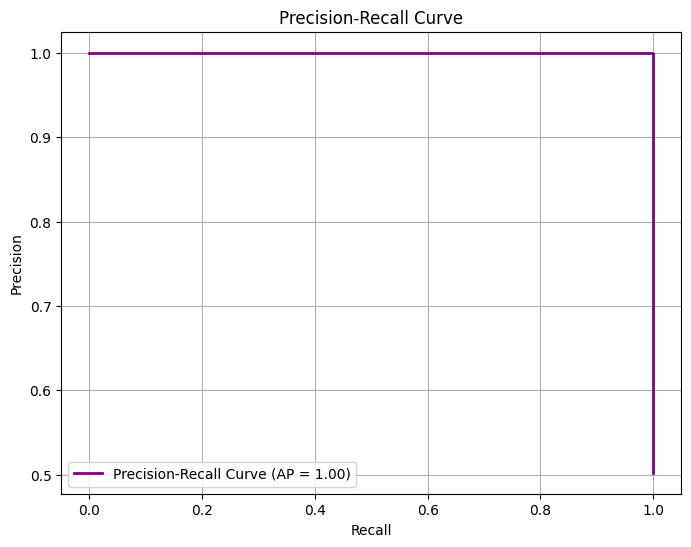

Model:Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


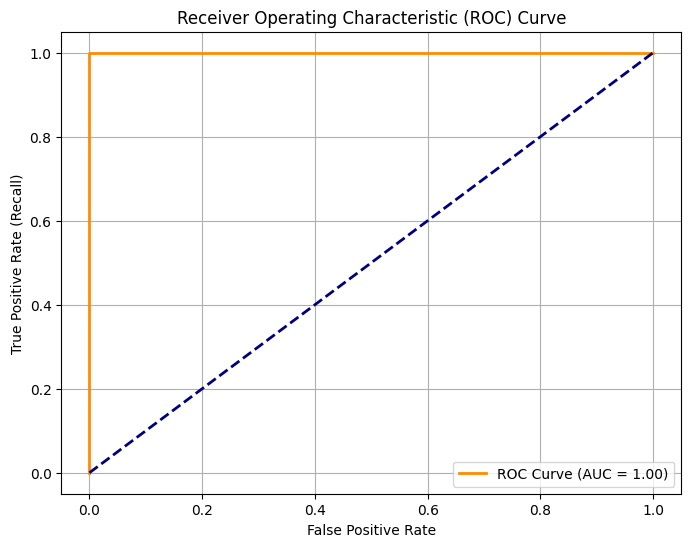

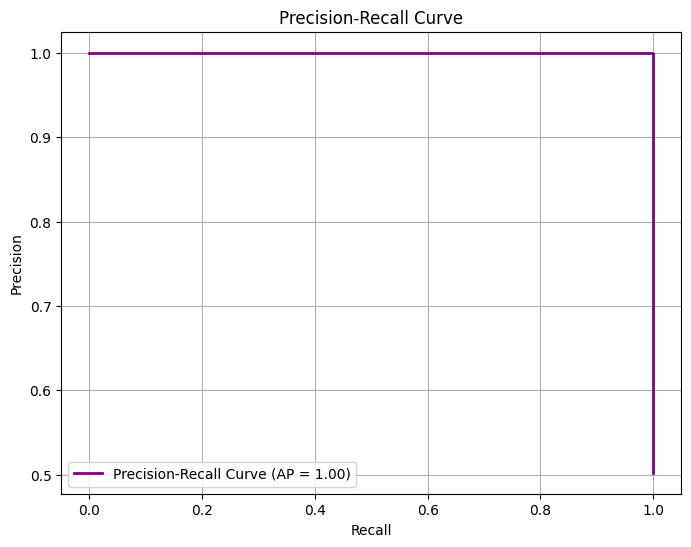

Model:Bagging


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


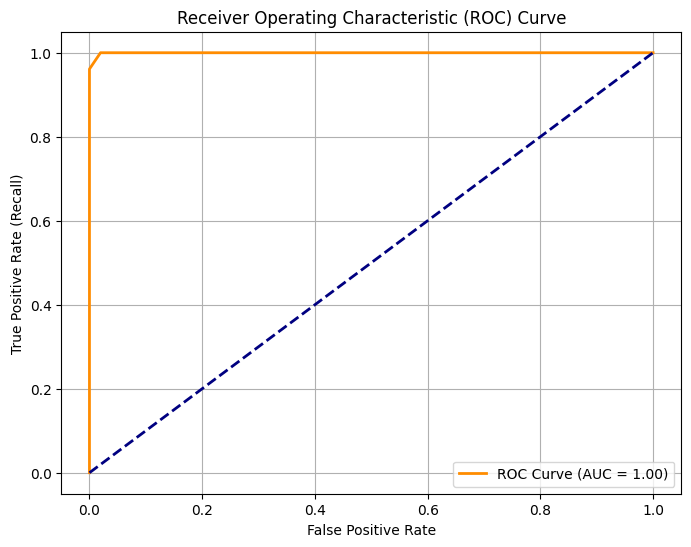

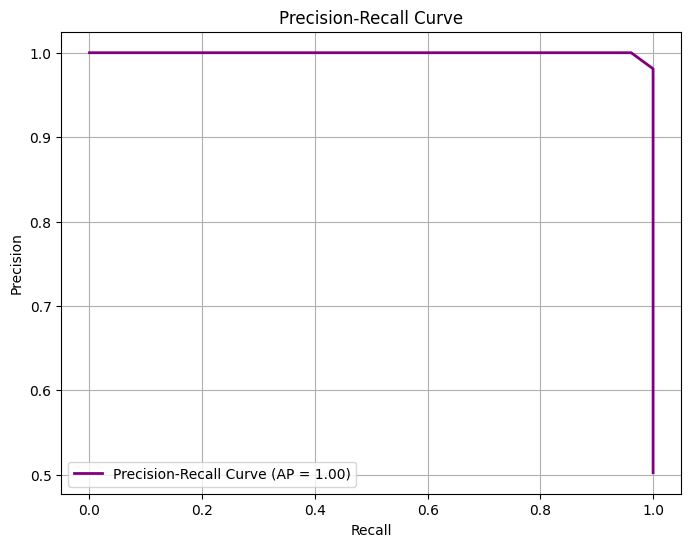

Model:AdaBoost


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


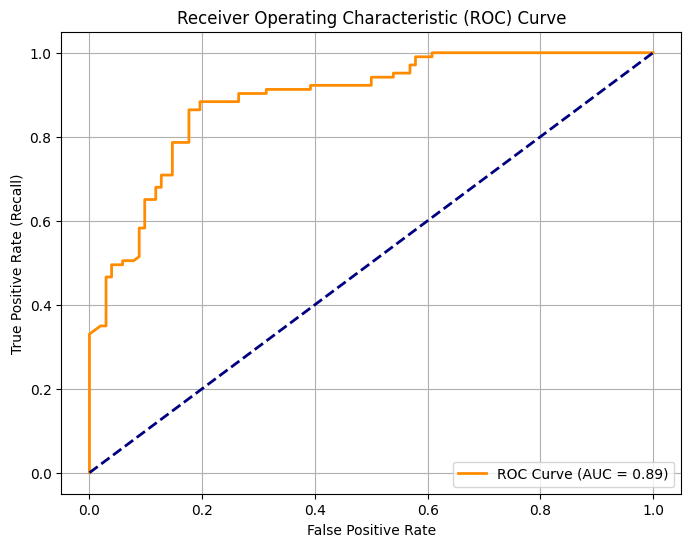

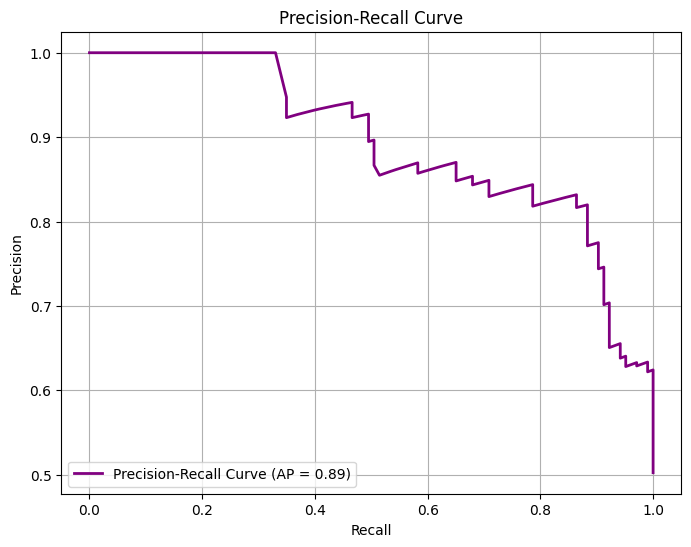

Model:Voting Classifier


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


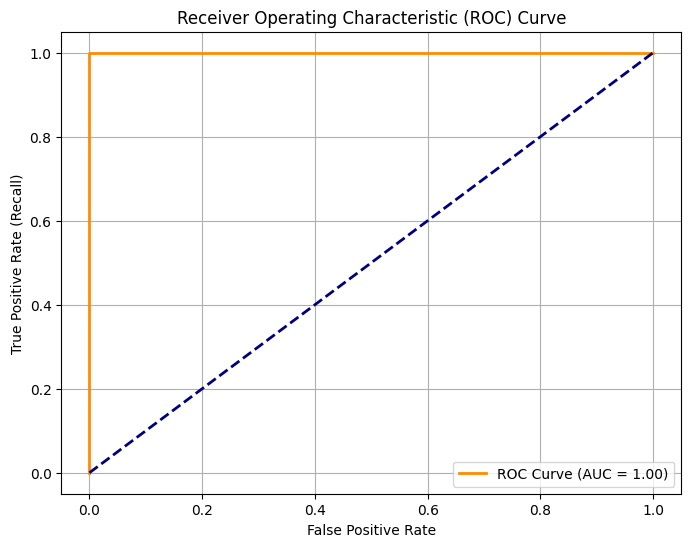

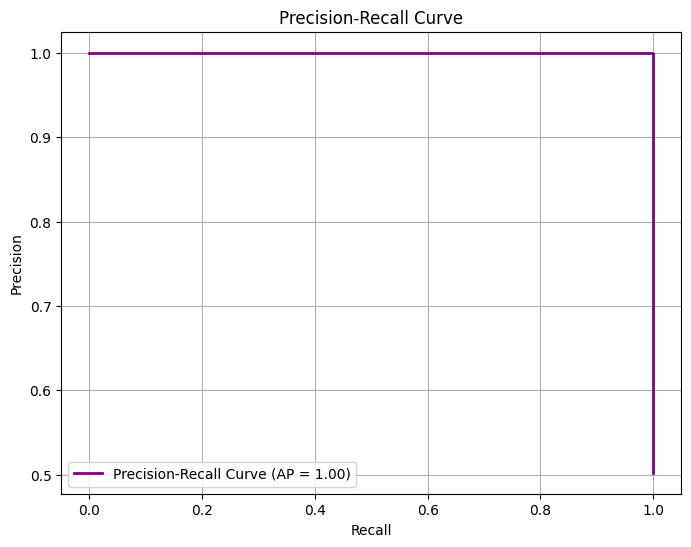

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
def plotting(name,model):
  print(f"Model:{name}")
#  Predict probabilities on Test Set:
  y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for class 1 (Heart Disease)

#ROC Curve:
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = roc_auc_score(y_test, y_proba)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.grid()
  plt.show()

# Precision-Recall Curve:
  precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
  pr_auc = average_precision_score(y_test, y_proba)

  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall Curve (AP = {pr_auc:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.grid()
  plt.show()


models = {
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Bagging': bagging_model,
    'AdaBoost': ada_model,
    'Voting Classifier': voting_model
}

for name, model in models.items():
    plotting(name, model)


# ***COMPARING ALL MODELS***

In [ ]:
def evaluate_model_metrics(name, model, X_train, X_test, y_train, y_test, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv,
                                scoring=['accuracy', 'precision', 'recall', 'f1'])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []
models = {
    'Logistic': log_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Bagging': bagging_model,
    'AdaBoost': ada_model,
    'Voting Classifier': voting_model
}
for name, model in models.items():
    metrics = evaluate_model_metrics(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_e

               Model  Accuracy  Precision    Recall  F1 Score
0           Logistic  0.804878   0.783784  0.844660  0.813084
1                SVM  0.800000   0.781818  0.834951  0.807512
2      Decision Tree  1.000000   1.000000  1.000000  1.000000
3      Random Forest  1.000000   1.000000  1.000000  1.000000
4            Bagging  0.990244   0.980952  1.000000  0.990385
5           AdaBoost  0.843902   0.831776  0.864078  0.847619
6  Voting Classifier  1.000000   1.000000  1.000000  1.000000


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


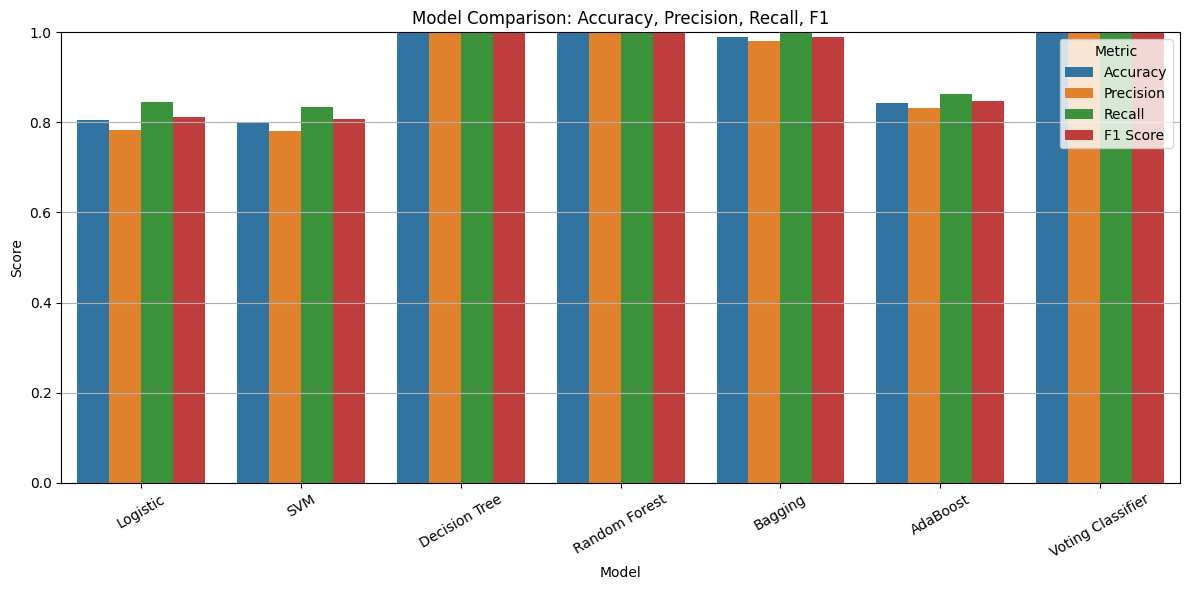

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt dataframe for grouped bar plot
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# ***For Application Purpose***

In [45]:
import joblib

# Save model to file
joblib.dump(log_model, 'log_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(bagging_model, 'bagging_model.pkl')
joblib.dump(ada_model, 'ada_model.pkl')
joblib.dump(voting_model, 'voting_model.pkl')


['voting_model.pkl']